In [1]:
import os
print('Working Directory: {}'.format(os.getcwd()))

Working Directory: C:\Users\SUJITH KUMAR\Downloads\Insurance-master


## Data Import 

In [2]:
import pandas as pd
import numpy as np

data = pd.ExcelFile('Data-All.xlsx')
print(data.sheet_names)
df1 = data.parse('Sheet1')
#df1.info()

['Sheet1']


In [3]:
print('Shape of Data: {}'.format(df1.shape))
print('Dimentions of data:',df1.ndim)
print('Data Index:',df1.index)

Shape of Data: (39782, 34)
Dimentions of data: 2
Data Index: RangeIndex(start=0, stop=39782, step=1)


In [4]:
# Replace the spaces in clumn names to underscore and convert column headers to lower case

df1.columns = df1.columns.str.replace(' ','_')
df1.columns = df1.columns.str.lower()

In [5]:
df1.head()

,claim,effective_year,account,market,sex,jurisdiction_state,accident_state,classcode,class_desription,occupation,...,body_part_group,cause_of_injury,case_of_injury_group,nature_of_injury,nature_of_injury_group,total_incurred_amount,indemnity,medical,expenses,sum_(medical-indemnity-expenses)
0,24209433,2015,832735,FRUIT & VEG GROWER/SHIPPER/PACKER,NaN,CA,CA,40,NaN,FARM LABORER,...,NaN,NaN,NaN,NaN,NaN,0.00,174.92,101.84,28.09,304.85
1,24125802,2015,832735,FRUIT & VEG GROWER/SHIPPER/PACKER,NaN,CA,CA,40,NaN,FARM LABORER,...,NaN,NaN,NaN,NaN,NaN,0.00,157.60,218.65,30.56,406.81
2,24274218,2015,832735,FRUIT & VEG GROWER/SHIPPER/PACKER,NaN,CA,CA,40,NaN,FARM LABORER,...,NaN,NaN,NaN,NaN,NaN,0.00,296.83,242.48,30.56,569.87
3,2427360,2015,618523,OTHER,NaN,TX,TX,8810,CLERICAL OFFICE OR LIBRARIES,LABORER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,843291,2009,748045,NURSERY/GREENHOUSE WHOLESALE,M,MN,MN,5,NURSERY EMPLOYEES,SHIPPING MGR,...,Neck,FROM DIFFERENT LEVEL (ELEVATIO,"Fall, Slip, or Trip Injury",MULTIPLE PHYSICAL INJURIES ONL,Multiple Injuries,54579.79,12265.75,42314.04,0.00,54579.79


## Data Engineering

In [7]:
df2 = df1

In [8]:
df2.market.value_counts()

GRAIN ELEVATORS                                      7404
RACE CAR OWNERS, RACING TEAMS                        4097
REFINED FUEL (inc. Cstores)                          3198
IMPLEMENT DEALER                                     2359
AG SUPPLY/FARM STORES                                2191
EGG LAYING AND PROCESSORS                            1990
FEEDMILLS FOR LIVESTOCK AND PET FOODS                1836
FOOD DISTRIBUTORS                                    1426
FERTILIZER BLENDING & DISTRIBUTION                   1284
OTHER                                                1131
FRUIT & VEG GROWER/SHIPPER/PACKER                    1003
NURSERY/GREENHOUSE WHOLESALE                          992
MEAT PROCESSING (OTHER THAN POULTRY)                  851
ETHANOL                                               776
BOTTLERS/BEVERAGE DISTRIBUTORS                        618
FRUIT & VEGETABLE PROCESSING                          612
HOG CONFINEMENT                                       597
CATTLE FEEDLOT

In [9]:
df2.market.describe()

count               39782
unique                 49
top       GRAIN ELEVATORS
freq                 7404
Name: market, dtype: object

In [13]:
df2 = df2[df2.market != 'RACE CAR OWNERS, RACING TEAMS']
df2 = df2[df2.market != 'NURSERY/GREENHOUSE WHOLESALE']

In [14]:
df2.market.describe()

count               34693
unique                 47
top       GRAIN ELEVATORS
freq                 7404
Name: market, dtype: object

In [15]:
df2.market.value_counts()

GRAIN ELEVATORS                                      7404
REFINED FUEL (inc. Cstores)                          3198
IMPLEMENT DEALER                                     2359
AG SUPPLY/FARM STORES                                2191
EGG LAYING AND PROCESSORS                            1990
FEEDMILLS FOR LIVESTOCK AND PET FOODS                1836
FOOD DISTRIBUTORS                                    1426
FERTILIZER BLENDING & DISTRIBUTION                   1284
OTHER                                                1131
FRUIT & VEG GROWER/SHIPPER/PACKER                    1003
MEAT PROCESSING (OTHER THAN POULTRY)                  851
ETHANOL                                               776
BOTTLERS/BEVERAGE DISTRIBUTORS                        618
FRUIT & VEGETABLE PROCESSING                          612
HOG CONFINEMENT                                       597
CATTLE FEEDLOTS                                       593
AG CHEMICAL DISTRIBUTION                              570
GRAIN MILLING 

## Feature Selection

In [16]:
# Removal of top of four rows
df3 = df2[4:]
df3.shape

(34689, 34)

In [17]:
# Features to be removed from the data
print('Removing features...')
print(df3.columns[[0, 1, 2, 5, 8, 10, 11, 12, 15, 16, 17, 18, 19, 20, 21, 23, 25, 28, 29, 30, 31, 32, 33]])
df3.drop(df3.columns[[0, 1, 2, 5, 8, 10, 11, 12, 15, 16, 17, 18, 19, 20, 21, 23, 25, 28, 29, 30, 31, 32, 33]], axis=1, inplace=True)

Removing features...
Index(['claim', 'effective_year', 'account', 'jurisdiction_state',
       'class_desription', 'date_of_birth', 'date_of_hire', 'accident_date',
       'date_reported_to_employer', 'report_date', 'date_of_disability',
       'date_returened_to_work', 'claim_description', 'claim_status',
       'type_of_injury_code', 'body_part', 'cause_of_injury',
       'nature_of_injury_group', 'total_incurred_amount', 'indemnity',
       'medical', 'expenses', 'sum_(medical-indemnity-expenses)'],
      dtype='object')


C:\Users\SUJITH KUMAR\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [18]:
df3.shape

(34689, 11)

In [19]:
df3.case_of_injury_group.value_counts()

Strain or Injury by                9444
Fall, Slip, or Trip Injury         7823
Struck or Injured by               4813
Cut, Puncture, Scrape              3631
Miscellaneous                      3391
Caught In, Under, or Between       1342
Heat or Cold Exposures             1286
Vehicle                            1164
Striking Against or Stepping On    1099
Lifting or Handling                 648
Rubbed or Abraded by                 48
Name: case_of_injury_group, dtype: int64

In [20]:
searchfor = ['Rubbed or Abraded by', 'Lifting or Handling']
df3 = df3[~df3.case_of_injury_group.str.contains('|'.join(searchfor))]

In [22]:
df3['case_of_injury_group'].value_counts()

Strain or Injury by                9444
Fall, Slip, or Trip Injury         7823
Struck or Injured by               4813
Cut, Puncture, Scrape              3631
Miscellaneous                      3391
Caught In, Under, or Between       1342
Heat or Cold Exposures             1286
Vehicle                            1164
Striking Against or Stepping On    1099
Name: case_of_injury_group, dtype: int64

In [23]:
text_label = ['Caught In, Under, or Between', 'Cut, Puncture, Scrape', 'Fall, Slip, or Trip Injury', 
                    'Heat or Cold Exposures', 'Miscellaneous', 'Strain or Injury by', 
                    'Striking Against or Stepping On', 'Struck or Injured by', 'Vehicle'
        ]
text_label

['Caught In, Under, or Between',
 'Cut, Puncture, Scrape',
 'Fall, Slip, or Trip Injury',
 'Heat or Cold Exposures',
 'Miscellaneous',
 'Strain or Injury by',
 'Striking Against or Stepping On',
 'Struck or Injured by',
 'Vehicle']

In [24]:
check = df3['case_of_injury_group'].value_counts()
check

Strain or Injury by                9444
Fall, Slip, or Trip Injury         7823
Struck or Injured by               4813
Cut, Puncture, Scrape              3631
Miscellaneous                      3391
Caught In, Under, or Between       1342
Heat or Cold Exposures             1286
Vehicle                            1164
Striking Against or Stepping On    1099
Name: case_of_injury_group, dtype: int64

## Standardization and Normalization

In [25]:
# Standardization of features
df3["experience_years"] = (df3["experience_years"]-df3["experience_years"].min()) / (df3["experience_years"].max()-df3["experience_years"].min())
df3["age_at_accident_date"] = (df3["age_at_accident_date"]-df3["age_at_accident_date"].min()) / (df3["age_at_accident_date"].max()-df3["age_at_accident_date"].min())

In [26]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

df3['market'] = LE.fit_transform(df3['market'])
df3['type_of_injury'] = LE.fit_transform(df3['type_of_injury'])
df3['case_of_injury_group'] = LE.fit_transform(df3['case_of_injury_group'])
df3['nature_of_injury'] = LE.fit_transform(df3['nature_of_injury'])
df3['body_part_group'] = LE.fit_transform(df3['body_part_group'])
df3['occupation'] = LE.fit_transform(df3['occupation'].astype(str))
df3['accident_state'] = LE.fit_transform(df3['accident_state'])
df3['sex'] = LE.fit_transform(df3['sex'])
df3['classcode'] = LE.fit_transform(df3['classcode'].astype(str))

In [27]:
# Standardization

df3["nature_of_injury"] = (df3["nature_of_injury"]-df3["nature_of_injury"].min()) / (df3["nature_of_injury"].max()-df3["nature_of_injury"].min())
df3["accident_state"] = (df3["accident_state"]-df3["accident_state"].min()) / (df3["accident_state"].max()-df3["accident_state"].min())
df3["type_of_injury"] = (df3["type_of_injury"]-df3["type_of_injury"].min()) / (df3["type_of_injury"].max()-df3["type_of_injury"].min())
df3["occupation"] = (df3["occupation"]-df3["occupation"].min()) / (df3["occupation"].max()-df3["occupation"].min())
df3["classcode"] = (df3["classcode"]-df3["classcode"].min()) / (df3["classcode"].max()-df3["classcode"].min())
df3["body_part_group"] = (df3["body_part_group"]-df3["body_part_group"].min()) / (df3["body_part_group"].max()-df3["body_part_group"].min())
df3["market"] = (df3["market"]-df3["market"].min()) / (df3["market"].max()-df3["market"].min())
df3["sex"] = (df3["sex"]-df3["sex"].min()) / (df3["sex"].max()-df3["sex"].min())

In [28]:
df3.head()

,market,sex,accident_state,classcode,occupation,experience_years,age_at_accident_date,type_of_injury,body_part_group,case_of_injury_group,nature_of_injury
6,0.543478,0.5,0.040816,0.061905,0.463889,0.115312,0.506133,0.000000,0.500000,7,0.666667
7,0.500000,0.5,0.040816,0.061905,0.521637,0.086700,0.567563,0.333333,0.166667,7,0.666667
8,0.500000,0.0,0.040816,0.061905,0.637135,0.086386,0.626362,1.000000,0.500000,2,0.666667
9,0.500000,0.5,0.979592,0.061905,0.223684,0.176466,0.682529,0.333333,0.500000,2,0.666667
10,0.500000,0.0,0.040816,0.061905,0.463889,0.124273,0.630784,0.333333,0.500000,6,0.666667


In [29]:
# Feature Correlation
df3.corr(method ='pearson')

,market,sex,accident_state,classcode,occupation,experience_years,age_at_accident_date,type_of_injury,body_part_group,case_of_injury_group,nature_of_injury
market,1.000000,-0.029606,0.129343,0.167979,0.004909,0.031719,0.025673,0.016093,0.014137,-0.025199,-0.001951
sex,-0.029606,1.000000,0.024573,-0.006284,0.091714,0.071157,0.020933,0.029530,-0.017825,0.024421,0.018851
accident_state,0.129343,0.024573,1.000000,0.044743,0.035941,0.001150,-0.010418,0.015643,0.013946,-0.006059,0.009444
classcode,0.167979,-0.006284,0.044743,1.000000,0.024443,0.036079,0.051664,0.013458,-0.033218,0.036309,0.007558
occupation,0.004909,0.091714,0.035941,0.024443,1.000000,0.018389,0.004658,-0.010593,0.003577,0.001668,0.013552
experience_years,0.031719,0.071157,0.001150,0.036079,0.018389,1.000000,0.387269,0.013422,0.005734,0.001605,0.022068
age_at_accident_date,0.025673,0.020933,-0.010418,0.051664,0.004658,0.387269,1.000000,0.107684,0.005074,0.004190,0.036541
type_of_injury,0.016093,0.029530,0.015643,0.013458,-0.010593,0.013422,0.107684,1.000000,0.040750,0.010931,0.064019
body_part_group,0.014137,-0.017825,0.013946,-0.033218,0.003577,0.005734,0.005074,0.040750,1.000000,-0.121722,0.214925
case_of_injury_group,-0.025199,0.024421,-0.006059,0.036309,0.001668,0.001605,0.004190,0.010931,-0.121722,1.000000,0.039013


## Data Separation

In [33]:
features = df3.drop('case_of_injury_group', 1)
labels = df3[['case_of_injury_group']]

In [34]:
features.shape

(33993, 10)

In [35]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
print('Number of train and test data:')
print(number_of_train, number_of_test)

Number of train and test data:
27194 6799


In [36]:
from imblearn.over_sampling import SMOTE
sm = SMOTE('minority')
x_train_res, y_train_res = sm.fit_sample(X_train, Y_train)
print(x_train_res.shape, y_train_res.shape)

(33893, 10) (33893,)


C:\Users\SUJITH KUMAR\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
from keras.utils import to_categorical
#one-hot encode target column
train_y_2 = to_categorical(Y_train)
test_y_2 = to_categorical(Y_test)

#vcheck that target column has been converted
train_y_2[0:5]

Using TensorFlow backend.


array([[0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils.vis_utils import plot_model

#create model
model = Sequential()

#get number of columns in training data
n_cols = X_train.shape[1]

#add layers to model
model.add(Dense(200, activation='relu', input_shape=(n_cols,)))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))

model.add(Dense(9, activation='softmax'))


In [39]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
from keras.callbacks import EarlyStopping 
early_stopping_monitor = EarlyStopping(patience=10)

#train model
model.fit(X_train, train_y_2, epochs=20, validation_split=0.2, callbacks=[early_stopping_monitor])

Train on 21755 samples, validate on 5439 samples
Epoch 1/20
21755/21755 [==============================] - 3s 155us/step - loss: 1.4961 - acc: 0.4626 - val_loss: 1.4145 - val_acc: 0.5076
Epoch 2/20
21755/21755 [==============================] - 3s 122us/step - loss: 1.3400 - acc: 0.5309 - val_loss: 1.2818 - val_acc: 0.5512
Epoch 3/20
21755/21755 [==============================] - 3s 121us/step - loss: 1.2886 - acc: 0.5453 - val_loss: 1.2152 - val_acc: 0.5643
Epoch 4/20
21755/21755 [==============================] - 3s 124us/step - loss: 1.2581 - acc: 0.5520 - val_loss: 1.2596 - val_acc: 0.5541
Epoch 5/20
21755/21755 [==============================] - 3s 122us/step - loss: 1.2479 - acc: 0.5548 - val_loss: 1.2135 - val_acc: 0.5784
Epoch 6/20
21755/21755 [==============================] - 3s 121us/step - loss: 1.2313 - acc: 0.5637 - val_loss: 1.1802 - val_acc: 0.5810
Epoch 7/20
21755/21755 [==============================] - 3s 121us/step - loss: 1.2211 - acc: 0.5646 - val_loss: 1.1501 - v

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               2200      
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_4 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_5 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_6 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_7 (Dense)              (None, 9)                 1809      
Total para

In [42]:
y_score = model.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_y_2.argmax(axis=1), y_score.argmax(axis=1))
print(cnf_matrix)

[[  54   41   32    1   21   24    0  100    3]
 [   7  645   21    0   11    3    0   57    0]
 [  22   55  438    0   87  656    0  267    9]
 [   9    6   10  205   39    1    0    4    2]
 [  11   57   47    9  454   63    0   55    7]
 [   4   27   35    0   55 1725    0   18    0]
 [   7   47   31    0    9   37    0   87    0]
 [  39  155  168    1  103   91    0  392    1]
 [   2    7   66    0   39   78    0   33    9]]


In [44]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

Normalized confusion matrix


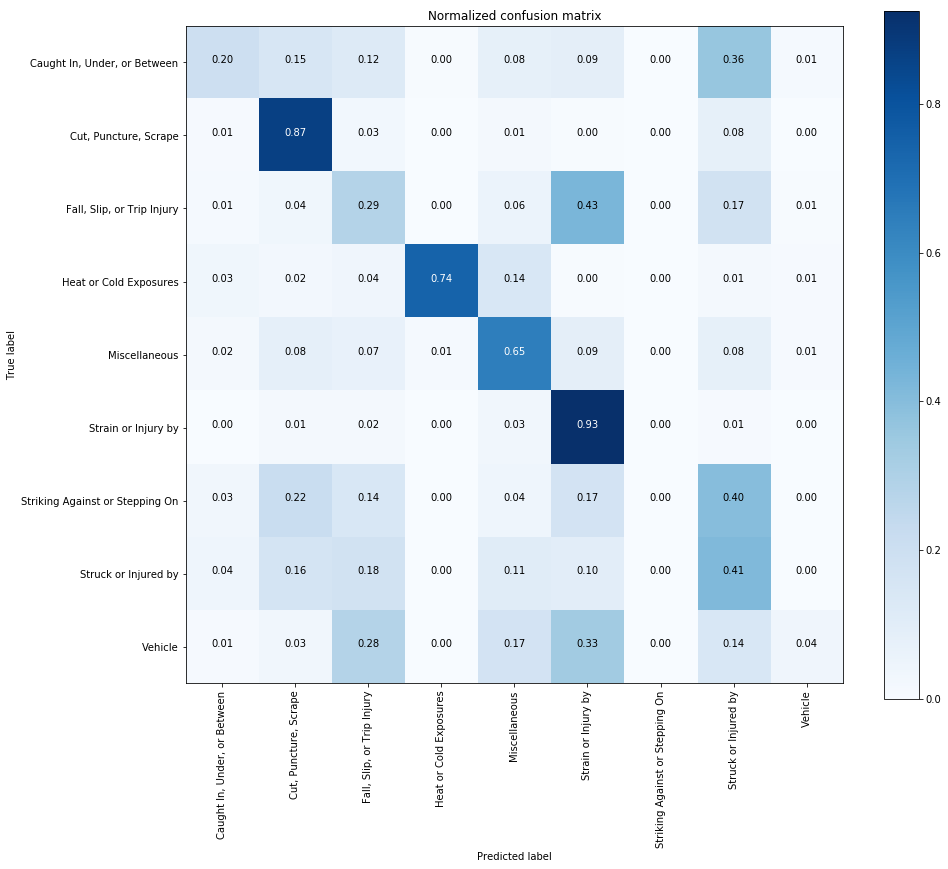

In [45]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools  
    import matplotlib.pyplot as plt
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


#y_pred = model.predict(x_test);
#cnf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Plot normalized confusion matrix
fig = plt.figure()
fig.set_size_inches(14, 12, forward=True)
#fig.align_labels()

# fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
plot_confusion_matrix(cnf_matrix, classes=np.asarray(text_label), normalize=True,
                      title='Normalized confusion matrix')

#fig.savefig("txt_classification-smote" + str(num_epochs) + ".png", pad_inches=5.0)


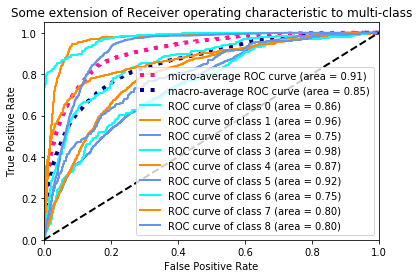

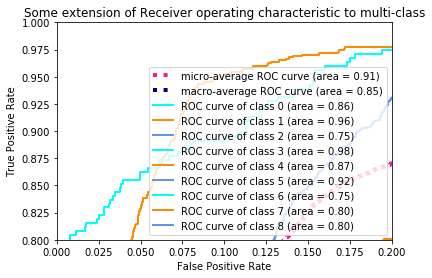

In [46]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2
n_classes = 9

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_y_2[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_y_2.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()